In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
ruta = os.path.join('data','votes.csv')
df_original = pd.read_csv(ruta)
df = df_original.copy()

In [3]:
df

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,COM
150,"Ilabaca Cerda, Marcos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,PS
151,"Undurraga Gazitúa, Francisco",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,EVO
152,"Hertz Cádiz, Carmen",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC


In [4]:
df_nulos = df.copy()
df_nulos['n_nulos'] = df.isna().sum(axis=1)
df_nulos[['Diputado/a','n_nulos']]
# diputado y sus valores nulos totales.

,Diputado/a,n_nulos
0,"Ahumada Palma, Yovana",121
1,"Fuenzalida Cobo, Juan",290
2,"Ossandón Irarrázabal, Ximena",139
3,"Alessandri Vergara, Jorge",352
4,"González Villarroel, Mauro",110
...,...,...
149,"Mix Jiménez, Claudia",154
150,"Ilabaca Cerda, Marcos",38
151,"Undurraga Gazitúa, Francisco",184
152,"Hertz Cádiz, Carmen",355


Los interpretaria como que el diputado estuvo ausente en esta votacion por le echo de que no hay otra opcion ademas de que igualmente por logica es poco probable un diputado este presente en todas las votaciones posibles.

### Pregunta 2

Remplazar los valores nan, por el promedio de esa votacion, de los que si votaron.

In [ ]:
columnas_no_votos = ['Diputado/a', 'party'] # columnas que no son votos
solo_votos = df.drop(columns=columnas_no_votos) # df de las puras votaciones
votos_reemplazados = solo_votos.apply(lambda col: col.fillna(col.mean()), axis=0) # promedio por columna osea por cada votacion.
df.loc[:, solo_votos.columns] = votos_reemplazados # Uno los df
df


,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,PDG
1,"Fuenzalida Cobo, Juan",1.000000,1.000000,1.000000,-1.000000,1.000000,1.0,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,UDI
2,"Ossandón Irarrázabal, Ximena",1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,RN
3,"Alessandri Vergara, Jorge",1.000000,1.000000,1.000000,-1.000000,1.000000,1.0,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,UDI
4,"González Villarroel, Mauro",1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",0.042553,0.041379,0.958621,0.633803,0.993007,1.0,0.986014,1.0,0.185185,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,COM
150,"Ilabaca Cerda, Marcos",0.042553,0.041379,0.958621,0.633803,0.993007,1.0,0.986014,1.0,0.185185,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,PS
151,"Undurraga Gazitúa, Francisco",0.042553,0.041379,0.958621,0.633803,0.993007,1.0,0.986014,1.0,0.185185,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,EVO
152,"Hertz Cádiz, Carmen",0.042553,0.041379,0.958621,0.633803,0.993007,1.0,0.986014,1.0,0.185185,...,0.748252,0.601399,0.573427,0.594406,0.692308,0.706294,0.951049,0.664336,0.769231,PC


Centrar los datos, osea sacar el promedio de votacion de cada diputado y restarselos a cada voto de ellos mismos.

In [6]:
promedio_columna = np.array(votos_reemplazados.mean(axis=1)).reshape(-1,1) #promedio por fila
datos_centrados = votos_reemplazados - promedio_columna
datos_centrados

,38467,38468,38469,38474,38475,38476,38477,38478,38487,38488,...,40433,40434,40435,40436,40437,40438,40439,40440,40441,40442
0,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,...,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885
1,0.476955,0.476955,0.476955,-1.523045,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,...,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955
2,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,-0.690022,...,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978
3,0.491855,0.491855,0.491855,-1.508145,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,...,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855
4,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,...,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.430980,-0.432154,0.485088,0.160270,0.519474,0.526467,0.512481,0.526467,-0.288348,-0.398906,...,0.526467,-1.473533,-1.473533,-1.473533,-1.473533,-1.473533,-0.473533,-1.473533,-1.473533,-0.473533
150,-0.560036,-0.561210,0.356032,0.031214,0.390418,0.397411,0.383425,0.397411,-0.417404,-0.527962,...,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411
151,-0.527195,-0.528369,0.388872,0.064054,0.423258,0.430251,0.416265,0.430251,-0.384563,-0.495122,...,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251
152,-0.489028,-0.490202,0.427039,0.102221,0.461426,0.468419,0.454433,0.468419,-0.346396,-0.456955,...,0.468419,0.216670,0.069817,0.041845,0.062824,0.160726,0.174712,0.419468,0.132754,0.237649


In [7]:
datos_numericos_centrados = datos_centrados.copy()
columnas_no_numericas = df.iloc[:, [0, -1]]
df_centrado = pd.concat([columnas_no_numericas, datos_numericos_centrados], axis=1)
df_centrado

,Diputado/a,party,38467,38468,38469,38474,38475,38476,38477,38478,...,40433,40434,40435,40436,40437,40438,40439,40440,40441,40442
0,"Ahumada Palma, Yovana",PDG,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,...,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885,0.341885
1,"Fuenzalida Cobo, Juan",UDI,0.476955,0.476955,0.476955,-1.523045,0.476955,0.476955,0.476955,0.476955,...,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955,0.476955
2,"Ossandón Irarrázabal, Ximena",RN,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,...,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978,0.309978
3,"Alessandri Vergara, Jorge",UDI,0.491855,0.491855,0.491855,-1.508145,0.491855,0.491855,0.491855,0.491855,...,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855,0.491855
4,"González Villarroel, Mauro",RN,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,...,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228,0.333228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",COM,-0.430980,-0.432154,0.485088,0.160270,0.519474,0.526467,0.512481,0.526467,...,0.526467,-1.473533,-1.473533,-1.473533,-1.473533,-1.473533,-0.473533,-1.473533,-1.473533,-0.473533
150,"Ilabaca Cerda, Marcos",PS,-0.560036,-0.561210,0.356032,0.031214,0.390418,0.397411,0.383425,0.397411,...,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411,0.397411
151,"Undurraga Gazitúa, Francisco",EVO,-0.527195,-0.528369,0.388872,0.064054,0.423258,0.430251,0.416265,0.430251,...,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251,0.430251
152,"Hertz Cádiz, Carmen",PC,-0.489028,-0.490202,0.427039,0.102221,0.461426,0.468419,0.454433,0.468419,...,0.468419,0.216670,0.069817,0.041845,0.062824,0.160726,0.174712,0.419468,0.132754,0.237649


In [8]:
columnas_info = df[['Diputado/a', 'party']].copy()

In [21]:
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]
k = 2 # dimesion 2
A = datos_centrados.to_numpy() #matriz de los datos centrados
U_k, S_k, Vh_k = truncated_svd(A, k) # SVD

proyeccion = A @ Vh_k.T  # Multiplico la matriz de datos centrados por la matriz que tiene como diagonales a los 2 valores singulares
proyeccion

array([[ -3.28282435,  15.71923908],
       [ -2.36931822,  17.91585498],
       [ -1.77155929,  15.4271843 ],
       [ -2.32170921,  18.00765812],
       [ -5.71666012,  17.57477264],
       [  2.33652602,  10.78349795],
       [ -9.63234925,  19.08403029],
       [ -3.20933124,  18.24166091],
       [ -4.72687186,  16.51758658],
       [ -1.25558468,  13.51588414],
       [ -9.76590184,  18.69429461],
       [ -2.57167529,  14.75621081],
       [ -7.88489466,  19.40995207],
       [ -5.24438543,  18.69294858],
       [  3.72942645,   9.31887464],
       [ -7.04662822,  20.25866227],
       [-11.80941854,  19.52008841],
       [ -6.46292143,  19.12455234],
       [ -5.88359094,  18.22318505],
       [ -7.00402337,  19.69901843],
       [ -5.81012128,  18.78964584],
       [ -5.3883935 ,  19.10216362],
       [ -0.09821646,  17.56943416],
       [ -6.50231342,  19.35833995],
       [ -5.75979805,  18.8542036 ],
       [  1.26316082,  15.45317045],
       [ -0.94560365,  16.05308467],
 

In [10]:
columnas_info

,Diputado/a,party
0,"Ahumada Palma, Yovana",PDG
1,"Fuenzalida Cobo, Juan",UDI
2,"Ossandón Irarrázabal, Ximena",RN
3,"Alessandri Vergara, Jorge",UDI
4,"González Villarroel, Mauro",RN
...,...,...
149,"Mix Jiménez, Claudia",COM
150,"Ilabaca Cerda, Marcos",PS
151,"Undurraga Gazitúa, Francisco",EVO
152,"Hertz Cádiz, Carmen",PC


In [11]:
df_proyeccion = pd.DataFrame(proyeccion, columns=["Vector principal 1", "Vector principal 2"])
df_proyeccion = pd.concat([columnas_info.reset_index(drop=True), df_proyeccion], axis=1)
df_proyeccion

,Diputado/a,party,Vector principal 1,Vector principal 2
0,"Ahumada Palma, Yovana",PDG,-3.282824,15.719239
1,"Fuenzalida Cobo, Juan",UDI,-2.369318,17.915855
2,"Ossandón Irarrázabal, Ximena",RN,-1.771559,15.427184
3,"Alessandri Vergara, Jorge",UDI,-2.321709,18.007658
4,"González Villarroel, Mauro",RN,-5.716660,17.574773
...,...,...,...,...
149,"Mix Jiménez, Claudia",COM,22.994384,4.139989
150,"Ilabaca Cerda, Marcos",PS,20.282211,5.045202
151,"Undurraga Gazitúa, Francisco",EVO,-0.824080,17.806748
152,"Hertz Cádiz, Carmen",PC,18.403826,6.101538


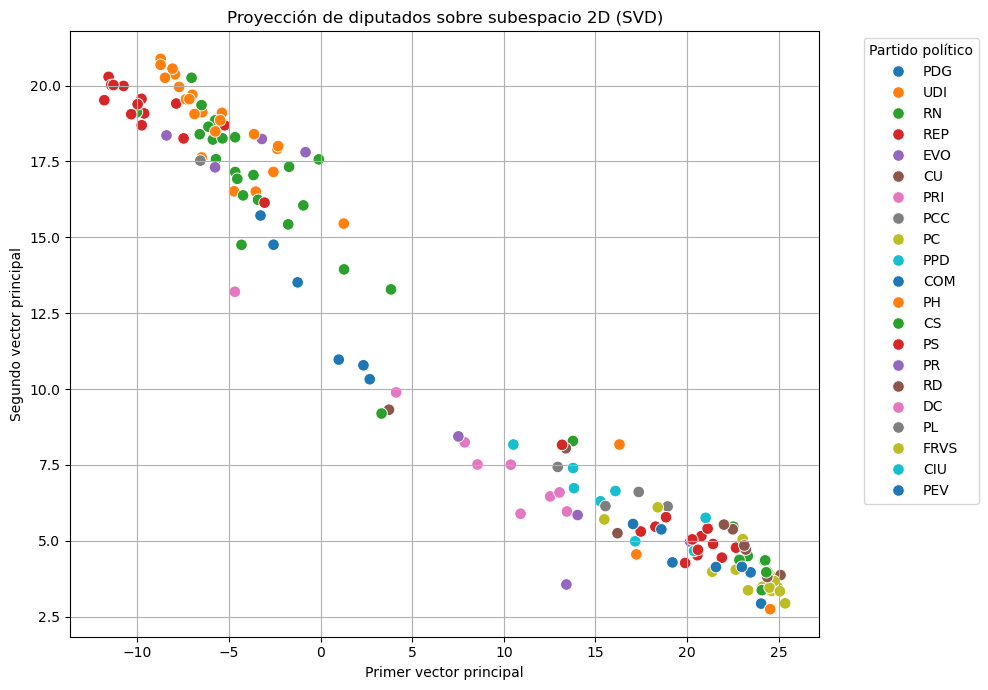

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_proyeccion,
    x="Vector principal 1",
    y="Vector principal 2",
    hue="party",
    palette="tab10",
    s=70
)
plt.title("Proyección de diputados sobre subespacio 2D (SVD)")
plt.xlabel("Primer vector principal")
plt.ylabel("Segundo vector principal")
plt.legend(title="Partido político", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### Pregunta 3

In [13]:
voto_columnas = df_original.columns.difference(['Diputado/a', 'party']) #df con solo los votos

df_filled = df_original.copy() #copia

# Iterar por cada partido
for partido in df_original['party'].unique():
    # filtro por cada partido
    df_partido = df_filled[df_filled['party'] == partido]
    
    # cada columna por voto
    for columna in voto_columnas:
        # sacamos el promedio de votos no nulos por partido de esa votacion
        promedio = df_partido[columna].dropna().mean()
        
        # Vemos las filas con valores nulos de esa votacion
        nulos = (df_filled['party'] == partido) & (df_filled[columna].isnull())
        
        #remplazmos por el promedio de su partido
        df_filled.loc[nulos, columna] = promedio

df_filled

,Diputado/a,38467,38468,38469,38474,38475,38476,38477,38478,38487,...,40434,40435,40436,40437,40438,40439,40440,40441,40442,party
0,"Ahumada Palma, Yovana",1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,PDG
1,"Fuenzalida Cobo, Juan",1.0,1.0,1.000000,-1.000000,1.0,1.0,1.000000,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,UDI
2,"Ossandón Irarrázabal, Ximena",1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,RN
3,"Alessandri Vergara, Jorge",1.0,1.0,1.000000,-1.000000,1.0,1.0,1.000000,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,UDI
4,"González Villarroel, Mauro",1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,"Mix Jiménez, Claudia",-1.0,-1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,-1.000000,...,-1.000000,-1.0,-1.0,-1.0,-1.0,0.0,-1.000000,-1.000000,0.0,COM
150,"Ilabaca Cerda, Marcos",-1.0,-1.0,1.000000,1.000000,1.0,1.0,1.000000,1.0,-0.583333,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,PS
151,"Undurraga Gazitúa, Francisco",1.0,1.0,1.000000,0.333333,1.0,1.0,0.666667,1.0,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,EVO
152,"Hertz Cádiz, Carmen",-1.0,-1.0,0.636364,1.000000,1.0,1.0,1.000000,1.0,-1.000000,...,-0.142857,-1.0,-1.0,-1.0,-1.0,-1.0,0.857143,-0.428571,0.0,PC


In [ ]:
Matriz_solo_votos = df_filled[voto_columnas].values # solo los numeros
U_k, S_k, Vh_k = truncated_svd(Matriz_solo_votos, 2) # SVD

projeccion_2 = U_k @ np.diag(S_k)   
# npe.diag(S_k) es una matriz diagonal de 2x2 con los valores singulares
projeccion_2


array([[-23.63682988, -12.99695628],
       [-20.15701529, -18.88317593],
       [-24.5083799 , -14.02785202],
       [-20.20670863, -19.64752198],
       [-23.3288214 , -17.45657552],
       [-25.37881899,  -6.40989482],
       [-14.96457452, -21.48172511],
       [-22.33382821, -14.29419465],
       [-23.49450999, -15.89731348],
       [-23.72981197, -10.36546008],
       [-15.09498478, -21.56847816],
       [-23.49747275, -12.76262834],
       [-15.43345022, -21.34623808],
       [-15.45672293, -21.49735251],
       [-25.46297414,  -4.42105471],
       [-22.97992239, -18.54318375],
       [-13.81014474, -21.28752465],
       [-20.50867388, -19.39201161],
       [-24.01373129, -16.92677449],
       [-20.99813333, -19.32966556],
       [-23.49962487, -17.8743913 ],
       [-19.44177472, -19.92589516],
       [-23.10905201, -18.13239999],
       [-22.59707706, -18.02108118],
       [-23.80921474, -17.26272042],
       [-22.7445227 , -16.90603309],
       [-24.04139127, -15.49162975],
 

In [17]:
proyeccion_df_2 = pd.DataFrame(projeccion_2, columns=['vector 1', 'vector 2'])
df_final_2 = pd.concat([
    df_filled[['Diputado/a', 'party']],  # Columnas de identificación
    proyeccion_df_2                       # Componentes principales
], axis=1)

In [18]:
df_final_2

,Diputado/a,party,vector 1,vector 2
0,"Ahumada Palma, Yovana",PDG,-23.636830,-12.996956
1,"Fuenzalida Cobo, Juan",UDI,-20.157015,-18.883176
2,"Ossandón Irarrázabal, Ximena",RN,-24.508380,-14.027852
3,"Alessandri Vergara, Jorge",UDI,-20.206709,-19.647522
4,"González Villarroel, Mauro",RN,-23.328821,-17.456576
...,...,...,...,...
149,"Mix Jiménez, Claudia",COM,-22.945113,18.230111
150,"Ilabaca Cerda, Marcos",PS,-25.543746,13.340244
151,"Undurraga Gazitúa, Francisco",EVO,-21.902944,-14.105024
152,"Hertz Cádiz, Carmen",PC,-23.016524,18.943951


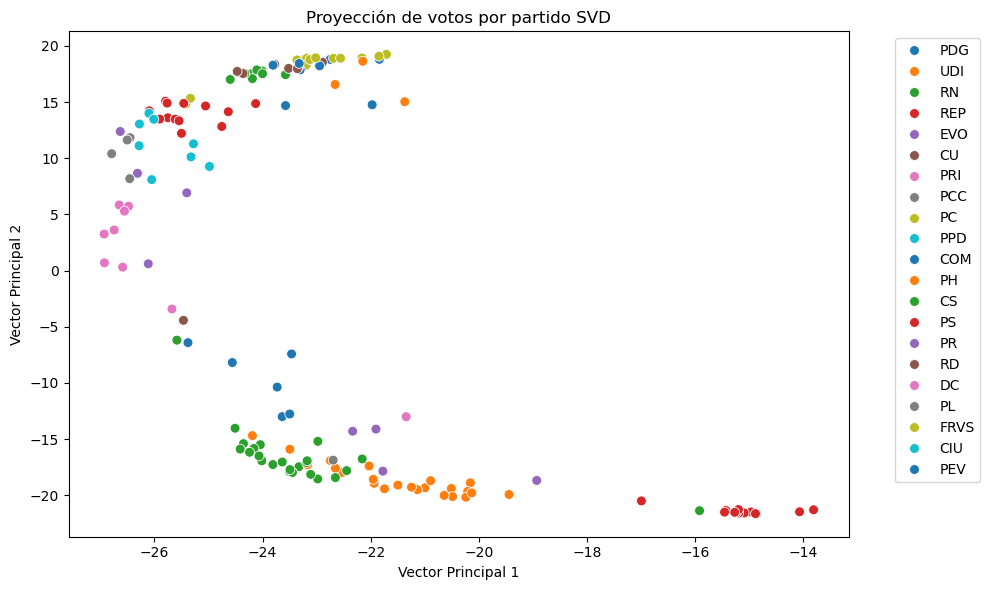

In [23]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    data=df_final_2,
    x='vector 1',
    y='vector 2',
    hue='party',
    palette='tab10',
    s=50 
)

plt.xlabel('Vector Principal 1')
plt.ylabel('Vector Principal 2')
plt.title('Proyección de votos por partido SVD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()  
plt.show()